In [1]:
# All the imports
import numpy as np
import skimage as ski
print(np.__file__)
print(np.__version__)
print(ski.__version__)
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import tensorflow as tf
from skimage.transform import resize
from graphviz import Graph, render
from utils.netviz import NetViz
from utils.mnistutil import MNISTUitl

/Users/mislam/anaconda/lib/python3.6/site-packages/numpy/__init__.py
1.16.2
0.14.2


/Users/mislam/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(28, 28)
(7, 7)


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


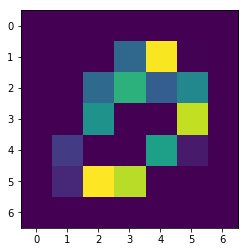

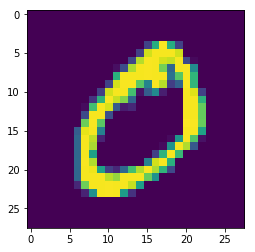

In [2]:
(A, Ay), (B, By) = mnist.load_data()
x = A[1]
print(x.shape)
xr = resize(x, (7, 7))
print(xr.shape)
plt.imshow(xr)
plt.show()
plt.imshow(x)
plt.show()

In [3]:
from utils.netviz import NetViz
mn = MNISTUitl()
viz = NetViz()

In [56]:
a = 0
b = 1
X, Y, x, y = mn.getdata(a,b,7,7)
y[y == a] = 0
Y[Y == a] = 0
y[y == b] = 1
Y[Y == b] =1
print(Y[0:100])
print(X.shape,x.shape,x.shape,y.shape)

/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0
 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1]
(12665, 7, 7) (2115, 7, 7) (2115, 7, 7) (2115,)


In [5]:
nm , xt, yt = mn.train(X, Y, x,y,7,7,2)

x_train shape: (12665, 7, 7, 1)
(12665, 7, 7, 1) 12665 train samples (12665,)
2115 test samples
(12665,) (12665,)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
12665/12665 [==============================] - 0s 38us/step - loss: 0.6822 - acc: 0.5341
Epoch 2/10
12665/12665 [==============================] - 0s 19us/step - loss: 0.6474 - acc: 0.6689

In [6]:
w, b = nm.layers[1].get_weights()
print(w.shape)
wp = np.where(w   > 0 )
wn = np.where(w   < 0 )
print(len(wn[0]),len(wp[0]))

(49, 7)
175 168


In [7]:
print(nm.predict(xt[1:2]),yt[1:2])

[[0.8814308  0.11856914]] [0]


In [8]:
x1 = xt[ 5:6]
y1 = yt[5:6]
print(x.shape)
#dot, A = vispredictpydot(nm,x1,y1,7,7)
#dot

(2115, 7, 7)


[1]
(2115, 7, 7)
(49, 7)
0.0038985005 0.16470957 0.9038271
(7,)  Here
0.017883435 -0.017986784 MINMAX W
0.7478537 -0.6950735 MINMAX W
{'p3', 'p0', 'p4', 'n5', 'p2', 'n4', 'n2', 'n1', 'p1', 'n0', 'n3'} {'n5', 'n4', 'n1', 'n0', 'n3'}
[[0.09617294 0.9038271 ]] [1]


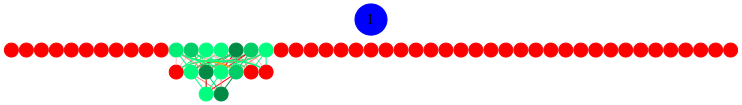

In [9]:
s = 19
e = 20
#for i in range(len(yt) -1):
#    p = nm.predict(xt[i:i+1])
#    l = yt[i:i + 1]
#    print(p)
#    if l == 1 and p[0][0] > p[0][1]:
#        s = i
#        e = i + 1
#        break
x1 = xt[ s:e]
y1 = yt[ s:e]
print(y1)
print(x.shape)
print(viz)
dot, A, g = viz.vispredict(nm,x1,y1,7,7)
print(nm.predict(x1),y1)
dot

In [10]:
dot.render('img/ones/onewn.gv')

'img/ones/onewn.gv.png'

In [11]:
nm.layers[2].get_weights()

[array([[-4.0119009e+00,  4.6076889e+00],
        [-6.5450186e-01, -2.7451634e-01],
        [ 4.1637678e+00, -4.8312392e+00],
        [-5.6720984e-01,  5.8682203e-01],
        [ 3.5349302e-02,  2.2695113e-03],
        [-4.2199945e+00,  4.2467442e+00],
        [ 4.8931284e+00, -4.9566026e+00]], dtype=float32),
 array([-0.03075117,  0.03075131], dtype=float32)]

In [12]:
v = -0.22682077*0.109194 + -0.59449071*0.112141 + 0.545078
print(v)

0.45364375013050995


[1]
(2115, 7, 7) (1, 7, 7, 1)
(49, 7)
0.0037908496 0.16896859 0.9157861
(7,)  Here
0.01664888 -0.016745094 MINMAX W
0.76606065 -0.7130465 MINMAX W
{'p3', 'p0', 'n5', 'p2', 'n4', 'n2', 'p4', 'p1', 'n1', 'n0', 'n3'} {'n4', 'n3', 'n0', 'n5'}
[[0.08421396 0.9157861 ]] [1]


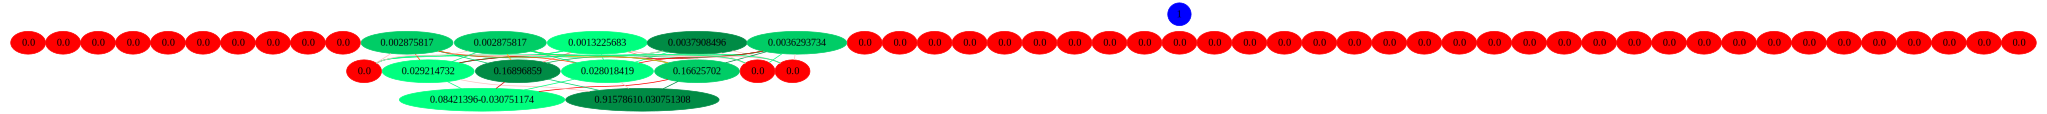

In [38]:
s = 8
e = 9
x1 = xt[ s:e]
y1 = yt[ s:e]
print(y1)
print(x.shape,x1.shape)
dot8, A = viz.vispredictwithlabel(nm,x1,y1,7,7)
print(nm.predict(x1),y1)
dot8

In [ ]:
dot8.render('img/withlabel/ones/oner.gv')

In [66]:
%ls attacks/FGSM
# Read an adversarial image
or_zero10 = plt.imread("attacks/FGSM/zero_new13.jpg")


ad_zero10 = plt.imread("attacks/FGSM/zero_new_adv13.jpg")

ad_zero10.shape


FFGSM Attack Example.ipynb  zero1.jpg
FGSM.py                     zero2.jpg
Jan-13-2018.hdf5            zero3.jpg
input/                      zero4.jpg
one_new0.jpg                zero5.jpg
one_new1.jpg                zero6.jpg
one_new10.jpg               zero7.jpg
one_new11.jpg               zero8.jpg
one_new12.jpg               zero9.jpg
one_new13.jpg               zero_adv0.jpg
one_new14.jpg               zero_adv1.jpg
one_new15.jpg               zero_adv2.jpg
one_new17.jpg               zero_adv3.jpg
one_new18.jpg               zero_adv4.jpg
one_new19.jpg               zero_adv5.jpg
one_new2.jpg                zero_adv6.jpg
one_new3.jpg                zero_adv7.jpg
one_new4.jpg                zero_adv8.jpg
one_new5.jpg                zero_adv9.jpg
one_new6.jpg                zero_new10.jpg
one_new7.jpg                zero_new11.jpg
one_new8.jpg                zero_new12.jpg
one_new9.jpg                zero_new13.jpg
one_new_adv0.jpg            zero_new14.jpg
one_new_adv1.jpg       

(28, 28)

(7, 7)


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


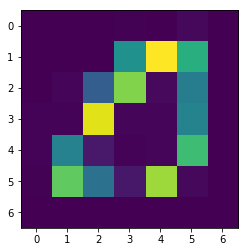

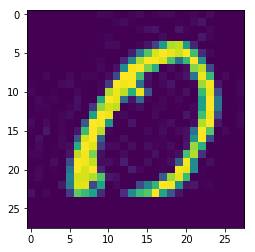

In [67]:
xo = resize(or_zero10, (7, 7))
print(xo.shape)
plt.imshow(xo)
plt.show()
plt.imshow(or_zero10)
plt.show()

(7, 7)


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


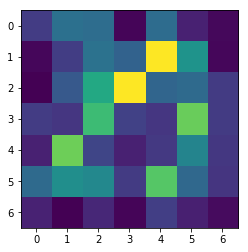

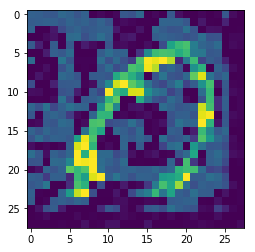

In [68]:
xa = resize(ad_zero10, (7, 7))
print(xa.shape)
plt.imshow(xa)
plt.show()
plt.imshow(ad_zero10)
plt.show()

[1]
(49, 7)
0.0035793925413302513 0.1478441469857139 0.8483587041474555
(7,)  Here
0.015939577580048266 -0.015316192468557383 MINMAX W
0.6767730373893903 -0.7142704418793566 MINMAX W
{'p3', 'p0', 'n5', 'p4', 'p2', 'n4', 'n2', 'n1', 'p1', 'n0', 'n3'} {'n4', 'n3', 'n5', 'n1'}
[[0.8483587  0.15164131]] [1]


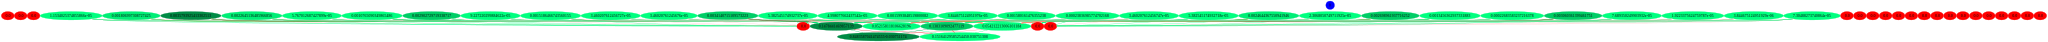

In [69]:
y0 = [0]
print(y1)
xo = xo.reshape(1,7,7,1)
xo = xo/255
doto, A = viz.vispredictwithlabel(nm,xo,0,7,7)
print(nm.predict(xo),y1)
doto

In [70]:
print(nm.predict(xo))
print(xo.shape)

[[0.8483587  0.15164131]]
(1, 7, 7, 1)


In [71]:
doto.render('img/attack/orzero13.gv')

'img/attack/orzero13.gv.png'

(49, 7)
0.0035793925413302513 0.1478441469857139 0.8483587041474555
(7,)  Here
0.015939577580048266 -0.015316192468557383 MINMAX W
0.6767730373893903 -0.7142704418793566 MINMAX W
{'p3', 'p0', 'n5', 'p4', 'p2', 'n4', 'n2', 'n1', 'p1', 'n0', 'n3'} {'n4', 'n3', 'n5', 'n1'}
[[0.8483587  0.15164131]]


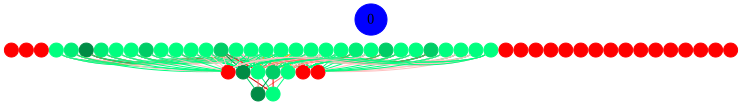

In [76]:
dotop, A, g = viz.vispredict(nm,xo,0,7,7)
print(nm.predict(xo))
dotop

In [77]:
dotop.render('img/attack/orzerowithoutval13.gv')

'img/attack/orzerowithoutval13.gv.png'

In [72]:
y0 = [0]
xa = xa.reshape(1,7,7,1)
xa = xa/255
dota, A = viz.vispredictwithlabel(nm,xa,0,7,7)
print(nm.predict(xa),y1)
dota

(49, 7)
0.0032372164552095374 0.153324588750851 0.8739270689945753
(7,)  Here
0.010871416889030813 -0.011099453225405304 MINMAX W
0.7114326551756678 -0.7407477670970862 MINMAX W
{'p3', 'p0', 'p4', 'n5', 'p2', 'n4', 'n2', 'n1', 'p1', 'n0', 'n3'} {'n4', 'n3', 'n5', 'n1'}
[[0.87392706 0.12607293]] [1]


In [73]:
dota.render('img/attack/adzero13.gv')

'img/attack/adzero13.gv.png'

(49, 7)
0.0032372164552095374 0.153324588750851 0.8739270689945753
(7,)  Here
0.010871416889030813 -0.011099453225405304 MINMAX W
0.7114326551756678 -0.7407477670970862 MINMAX W
{'p3', 'p0', 'p4', 'n5', 'p2', 'n4', 'n2', 'n1', 'p1', 'n0', 'n3'} {'n4', 'n3', 'n5', 'n1'}
[[0.87392706 0.12607293]] [[0.8483587  0.15164131]]


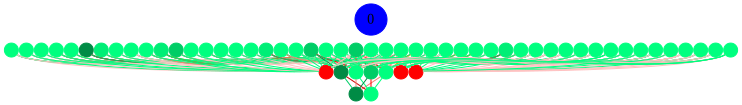

In [79]:
dotap, A, g = viz.vispredict(nm,xa,0,7,7)
print(nm.predict(xa),nm.predict(xo))
dotap

In [78]:
dotap.render('img/attack/adzerowithoutlabel13.gv')

'img/attack/adzerowithoutlabel13.gv.png'

(49, 7)
0.0037908496 4.6687884 4.8931284
(7,)  Here
4.6687884 -4.61377 MINMAX W
4.8931284 -4.9566026 MINMAX W
{'p3', 'p0', 'p4', 'n5', 'p2', 'n4', 'n2', 'n1', 'p1', 'n0', 'n3'} {'n4', 'n0', 'n3', 'n5'}


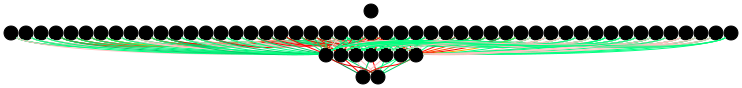

In [16]:
dots , As = viz.vispredictwights(nm,x1,y1,7,7)
dots

In [ ]:
dots.render('staticr.gv')

In [ ]:
s = 0
e = 1
x1 = xt[ s:e]
y1 = yt[ s:e]
dot8, A, G = viz.vispredict(nm,x1,y1,7,7)
dot8

In [ ]:
G.visit()
# IN37->L1N3->ON0-> For 0
# IN31->L1N1->ON1-> For 1
print(G.getPath())

In [ ]:
nm.summary()

In [ ]:
dot8.render('zeronew.gv')

In [ ]:
print(dot8)

In [ ]:
x1 = xt[3:4]
y1 = yt[3:3]
print(y1)
print(x.shape)
dot, A = vispredict(nm,x1,y1,7,7)
dot

In [ ]:
dot.render('zero.dot')

In [ ]:
a = [0, 0]
if (y1 == np.array(a)).all():
    print("One")
else:
    print("False")

In [ ]:
zeros = []
count = 0
print(yt)
for i in range(len(yt)):
    if yt[i] == [0 1]:
        zeros.append((xt[i:i+1], yt[i:i+1]))
        count += 1
        if count == 5:
            break
ones = [] 
count = 0
for i in range(len(yt)):
    if yt[i] == [1 0]:
        ones.append((xt[i:i+1], yt[i:i+1]))
        count += 1
        if count == 5:
            break

In [ ]:
'''
for i in range(0,len(zeros)):
    x, y = zeros[i]
    print(x.shape)
    dot, A = vispredict(nm,x,y)
    print(A)
    dot.render('zero{0}'.format(i))
    #render('dot', 'png', 'zero{0}.gv'.format(i))
for i in range(0,len(ones)):
    x, y = ones[i]
    print(x.shape)
    dot, A = vispredict(nm,x,y)
    print(A)
    dot.render('one{0}'.format(i))

'''


In [ ]:
nm.summary()